In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
name = 'seasia_sero_dt5'
infile = '../frequencies/southeast_asia/genotype/interserotype_effects/seasia_genotype_interserotypeEffects_dt5.csv'
model_performance = pd.read_csv(infile, index_col=0)

fit_params = ['DENV2_f0','DENV3_f0','DENV4_f0','beta', 'gamma', 'sigma']
metrics = ['abs_error', 'accuracy', 'beta', 'delta_sse', 'information_gain', 'pearson_r2', 'spearman_r']

/Users/Sidney/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Best fit (optimizing delta_sse):
DENV2_f0             0.000000
DENV3_f0             0.000000
DENV4_f0             0.000000
abs_error            0.135454
accuracy             0.545732
beta                 1.285714
delta_sse           12.016227
gamma                0.571429
information_gain   -11.664926
pearson_r2           0.090625
sigma                1.285714
spearman_r           0.095833
Name: 120320, dtype: float64


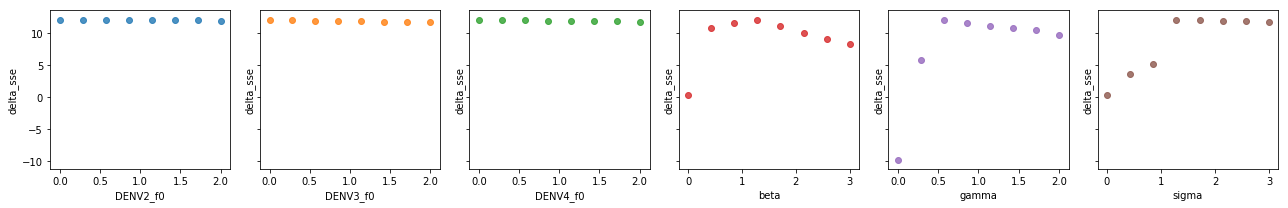

Best fit (optimizing pearson_r2):
DENV2_f0             1.714286
DENV3_f0             0.000000
DENV4_f0             0.000000
abs_error            0.145762
accuracy             0.643293
beta                 0.428571
delta_sse            4.351589
gamma                2.000000
information_gain    16.270884
pearson_r2           0.204465
sigma                2.142857
spearman_r           0.191485
Name: 60288, dtype: float64


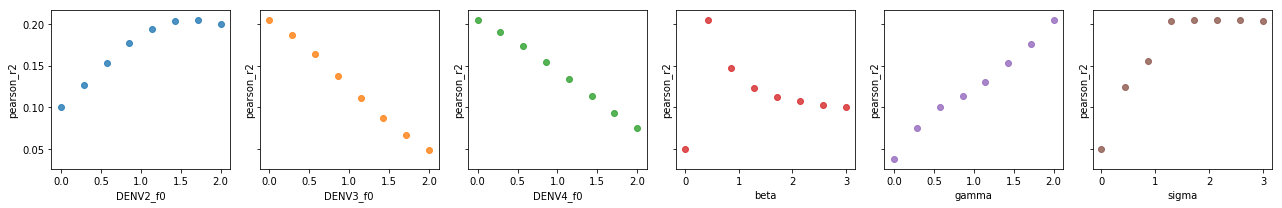

In [7]:
def plot_profile_likelihoods(model_performance, metric):

    if metric == 'abs_error':
        best_fit = model_performance.ix[model_performance[metric].idxmin()]
    else:
        best_fit = model_performance.ix[model_performance[metric].idxmax()]
    print 'Best fit (optimizing %s):\n'%metric, best_fit
    
    fig, axes = plt.subplots(ncols=len(fit_params), nrows=1, figsize=(3*len(fit_params), 3), sharey=True)
    for profile_param,ax in zip(fit_params, axes):
        
        fixed_params = [p for p in fit_params if p != profile_param]
        
        plot_data = model_performance
        for fp in fixed_params:
            plot_data = plot_data.loc[plot_data[fp] == best_fit[fp]]
        
        sns.regplot(profile_param, metric, data=plot_data, fit_reg=False, ax=ax)
        ax.set_xlabel(profile_param)
        ax.set_ylabel(metric)
        
    plt.tight_layout()
    plt.savefig('./png/%s_%s_perf.png', dpi=300, bbox_inches='tight')
    plt.show()

    
plot_profile_likelihoods(model_performance, 'delta_sse')
plot_profile_likelihoods(model_performance, 'pearson_r2')